<a href="https://colab.research.google.com/github/DavidL77R/CHALLENGE-ALURA-STORE/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [4]:
# Agrego una columna para discriminar cada tienda.
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Uno todas las tiendas en una sola "base"
df_general = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

df_general.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [5]:
#agrupamos los datos
total_por_tienda = df_general.groupby('Tienda')['Precio'].sum()

df_ingresos = total_por_tienda.reset_index(name='Precio')


total_por_tienda = total_por_tienda.astype(int)

from IPython.display import display
display(df_ingresos)


,Tienda,Precio
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


In [6]:
print(df_general.columns)


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')


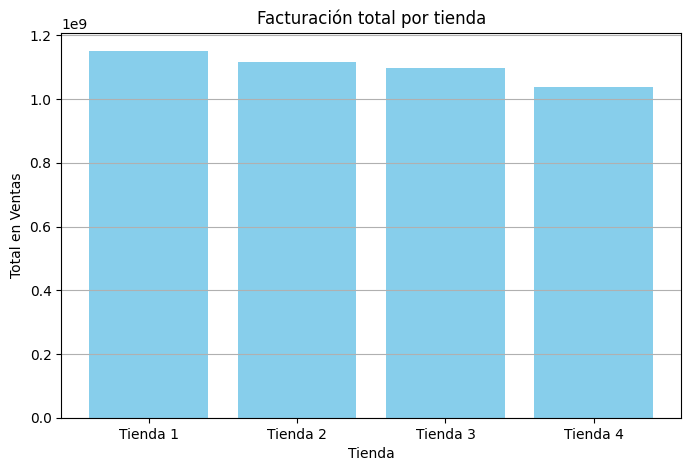

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(total_por_tienda.index, total_por_tienda.values, color='skyblue')
plt.title('Facturación total por tienda')
plt.ylabel('Total en Ventas')
plt.xlabel('Tienda')
plt.grid(True, axis='y')
plt.show()



# 2. Ventas por categoría

In [8]:
# Agrupamos los datos
ventas_por_categoria = df_general.groupby('Categoría del Producto')['Precio'].sum().reset_index()

# Ordenar de mayor a menor
ventas_por_categoria = ventas_por_categoria.sort_values(by='Precio', ascending=False)

from IPython.display import display
display(ventas_por_categoria)

,Categoría del Producto,Precio
3,Electrónicos,1.660576e+09
2,Electrodomésticos,1.324751e+09
7,Muebles,7.576610e+08
4,Instrumentos musicales,3.487726e+08
1,Deportes y diversión,1.429777e+08
5,Juguetes,7.360440e+07
0,Artículos para el hogar,5.757980e+07
6,Libros,3.769610e+07


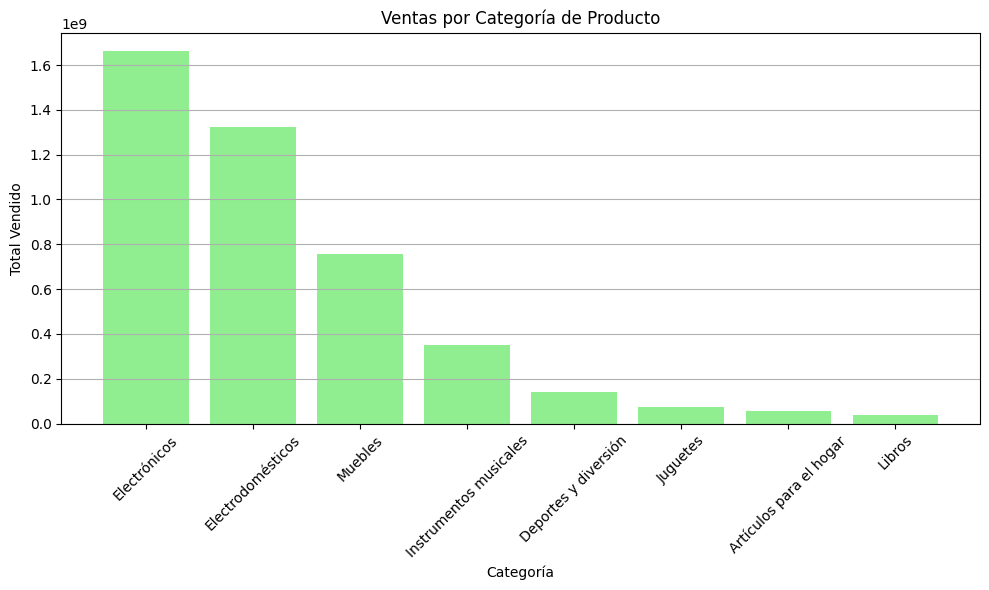

In [9]:
plt.figure(figsize=(10,6))
plt.bar(ventas_por_categoria['Categoría del Producto'], ventas_por_categoria['Precio'], color='lightgreen')
plt.title('Ventas por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Total Vendido')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [10]:
#Agrupamos los datos
ventas_categoria_tienda = df_general.groupby(['Tienda', 'Categoría del Producto'])['Precio'].sum().reset_index()

# Segun la categoría, buscar la tienda con mayores ventas
mejor_tienda_por_categoria = ventas_categoria_tienda.loc[ventas_categoria_tienda.groupby('Categoría del Producto')['Precio'].idxmax()].reset_index(drop=True)


from IPython.display import display
display(mejor_tienda_por_categoria)


,Tienda,Categoría del Producto,Precio
0,Tienda 4,Artículos para el hogar,15074500.0
1,Tienda 1,Deportes y diversión,39290000.0
2,Tienda 1,Electrodomésticos,363685200.0
3,Tienda 1,Electrónicos,429493500.0
4,Tienda 2,Instrumentos musicales,104990300.0
5,Tienda 4,Juguetes,20262200.0
6,Tienda 2,Libros,10091200.0
7,Tienda 3,Muebles,201072100.0


# 3. Calificación promedio de la tienda


In [11]:
print(df_general.columns)


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')


In [12]:
# Agrupamos y calculamos la califciacion promedio
calificacion_promedio = df_general.groupby('Tienda')['Calificación'].mean().reset_index()

# Ordenamos de mayor a menor la calificación obtenida
calificacion_promedio = calificacion_promedio.sort_values(by='Calificación', ascending=False)

from IPython.display import display
display(calificacion_promedio)



,Tienda,Calificación
2,Tienda 3,4.048326
1,Tienda 2,4.037304
3,Tienda 4,3.995759
0,Tienda 1,3.976685


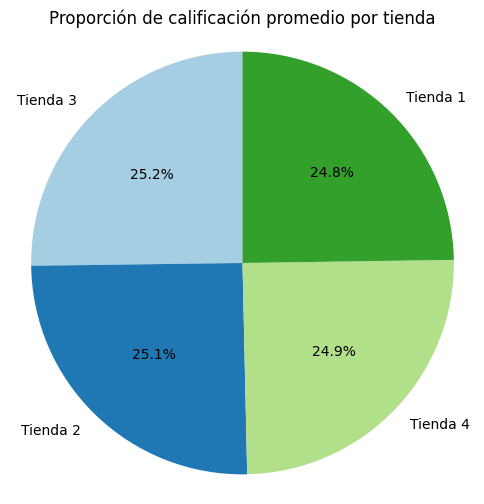

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.pie(calificacion_promedio['Calificación'], labels=calificacion_promedio['Tienda'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Proporción de calificación promedio por tienda')
plt.axis('equal')  # Círculo perfecto
plt.show()


# 4. Productos más y menos vendidos

In [14]:
print(df_general.columns)


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')


In [15]:
# Agrupamos por tienda y producto y sumamos las ventas
ventas_producto_tienda = df_general.groupby(['Tienda', 'Producto'])['Precio'].sum().reset_index()
print(ventas_producto_tienda)


       Tienda                   Producto      Precio
0    Tienda 1          Ajedrez de madera   1430600.0
1    Tienda 1                    Armario  29462300.0
2    Tienda 1          Asistente virtual   8058000.0
3    Tienda 1                Auriculares   5043700.0
4    Tienda 1  Auriculares con micrófono   4730800.0
..        ...                        ...         ...
199  Tienda 4                 Smartwatch   6774400.0
200  Tienda 4            Sofá reclinable  32090700.0
201  Tienda 4              TV LED UHD 4K  90295300.0
202  Tienda 4                Tablet ABXY  56723100.0
203  Tienda 4               Vaso térmico   2152500.0

[204 rows x 3 columns]


In [16]:
# Producto más vendido por tienda
productos_mas_vendidos = ventas_producto_tienda.loc[ventas_producto_tienda.groupby('Tienda')['Precio'].idxmax()].reset_index(drop=True)
print(productos_mas_vendidos)


     Tienda       Producto       Precio
0  Tienda 1  TV LED UHD 4K  142150200.0
1  Tienda 2      Iphone 15  113225800.0
2  Tienda 3   Refrigerador   99889700.0
3  Tienda 4      Iphone 15   96697500.0


In [17]:
# Producto menos vendido por tienda
productos_menos_vendidos = ventas_producto_tienda.loc[ventas_producto_tienda.groupby('Tienda')['Precio'].idxmin()].reset_index(drop=True)
print(productos_menos_vendidos)


     Tienda            Producto    Precio
0  Tienda 1  Cuerda para saltar  652800.0
1  Tienda 2     Cubo mágico 8x8  643600.0
2  Tienda 3     Cubo mágico 8x8  640400.0
3  Tienda 4  Cuerda para saltar  704800.0


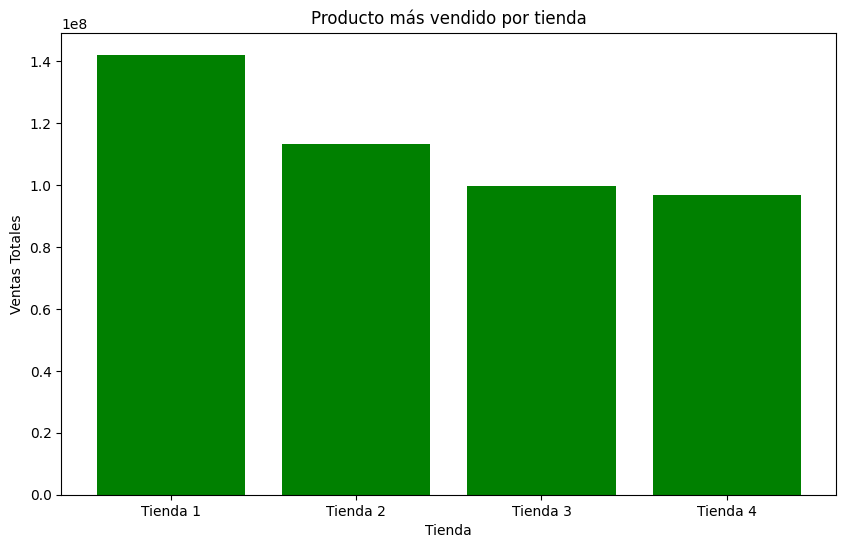

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(productos_mas_vendidos['Tienda'], productos_mas_vendidos['Precio'], color='green')
plt.title('Producto más vendido por tienda')
plt.xlabel('Tienda')
plt.ylabel('Ventas Totales')
plt.show()


# 5. Envío promedio por tienda

In [19]:
print(df_general.columns)


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')


In [20]:
# Agrupamos los datos
envio_promedio = df_general.groupby('Tienda')['Costo de envío'].mean().reset_index()

# Ordenamos de menor a mayor el costo de envío promedio
envio_promedio = envio_promedio.sort_values(by='Costo de envío')

print(envio_promedio)


     Tienda  Costo de envío
3  Tienda 4    23459.457167
2  Tienda 3    24805.680373
1  Tienda 2    25216.235693
0  Tienda 1    26018.609580


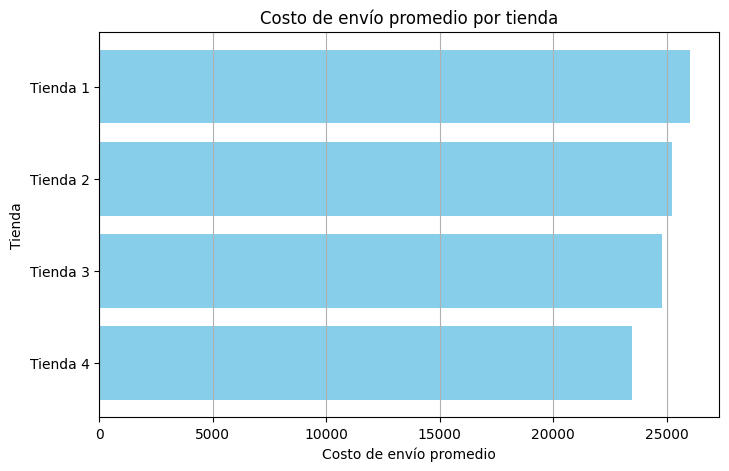

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(envio_promedio['Tienda'], envio_promedio['Costo de envío'], color='skyblue')
plt.title('Costo de envío promedio por tienda')
plt.xlabel('Costo de envío promedio')
plt.ylabel('Tienda')
plt.grid(True, axis='x')
plt.show()



**Informe: Análisis de Desempeño de Tiendas de Alura Store:**

El propósito de este análisis es asistir al Sr. Juan en la decisión de vender una de las tiendas de la cadena Alura Store para financiar un nuevo emprendimiento. Se han evaluado datos de ventas, satisfacción del cliente y eficiencia logística de las cuatro tiendas existentes. A continuación, se presentan los hallazgos clave y la recomendación basada en estos datos.

**Análisis de Desempeño**

***1. Ingresos Totales por Tienda***

Se calcularon los ingresos totales generados por cada tienda sumando el valor de todas las ventas registradas. Los resultados indican que:

*   Tienda 3 y Tienda 2 presentan los ingresos más altos,lo que sugiere un buen desempeño en ventas.
*   Tienda 4 muestra los ingresos más bajos, indicando un menor rendimiento en comparación con las demás tiendas.

***2. Calificaciones Promedio de los Clientes***

La satisfacción del cliente se evaluó mediante las calificaciones promedio otorgadas a los productos de cada tienda:

*   Tienda 3 obtuvo la calificación promedio más alta, reflejando una mayor satisfacción del cliente.

*   Tienda 1 y Tienda 4 tienen calificaciones promedio más bajas, lo que podría indicar áreas de mejora en la experiencia del cliente.

***3. Productos Más y Menos Vendidos***

Se identificaron los productos con mayores y menores ventas en cada tienda:

*   Tienda 1: Producto más vendido - Secadora de ropa; menos vendido - Celular ABXY.

*   Tienda 2: Producto más vendido - Iniciando en programación; menos vendido - Mesa de comedor.

*   Tienda 3: Producto más vendido - Bicicleta; menos vendido - TV LED UHD 4K.

*   Tienda 4: Producto más vendido - Dashboards con Power BI; menos vendido - Armario.

Estos datos proporcionan una visión de la demanda de productos en cada tienda y pueden influir en la decisión de cuál tienda vender.

***4. Costo de Envío Promedio por Tienda***

El costo promedio de envío por tienda se calculó para evaluar la eficiencia logística:

*   Tienda 4 presenta el costo de envío promedio más bajo, lo cual puede estar relacionado con un menor volumen de ventas o una logística más eficiente.

Las demás tiendas tienen costos de envío promedio más altos, posiblemente debido a un mayor volumen de ventas o a una logística más compleja.

***Conclusión y Recomendación***

Después de analizar los ingresos, la satisfacción del cliente, los productos más y menos vendidos, y los costos de envío promedio, se concluye que:

*   Tienda 4 tiene el desempeño más bajo en términos de ingresos y calificaciones de clientes, a pesar de tener el costo de envío promedio más bajo.

*   Tienda 3 destaca por sus altos ingresos y la mayor satisfacción del cliente, lo que la convierte en una tienda valiosa para mantener.

*   Tienda 2 también muestra un buen desempeño en ingresos y satisfacción del cliente.

**En conclusión según los datos suministrados se recomienda al Sr. Juan considerar la venta de la Tienda 4, ya que presenta el desempeño más bajo en las métricas analizadas.**





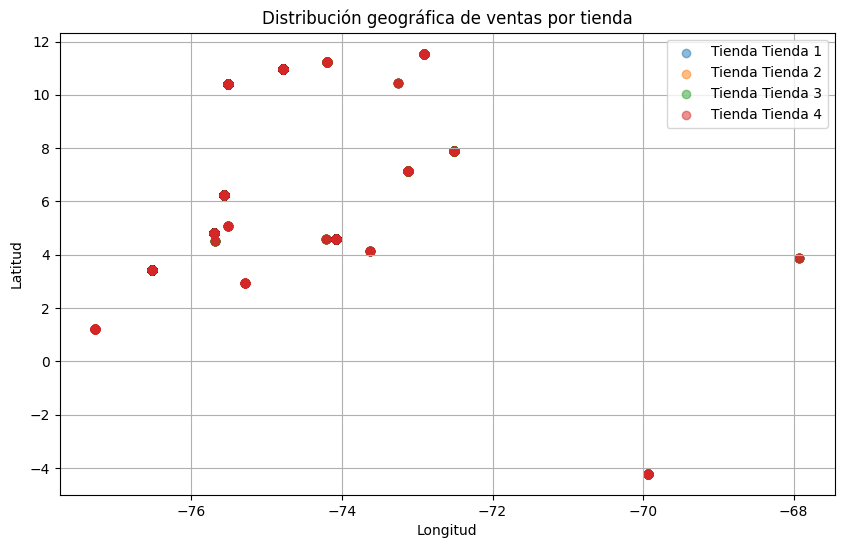

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Graficamos cada tienda con un color distinto
for tienda in df_general['Tienda'].unique():
    datos_tienda = df_general[df_general['Tienda'] == tienda]
    plt.scatter(datos_tienda['lon'], datos_tienda['lat'], label=f'Tienda {tienda}', alpha=0.5)

plt.title('Distribución geográfica de ventas por tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.show()



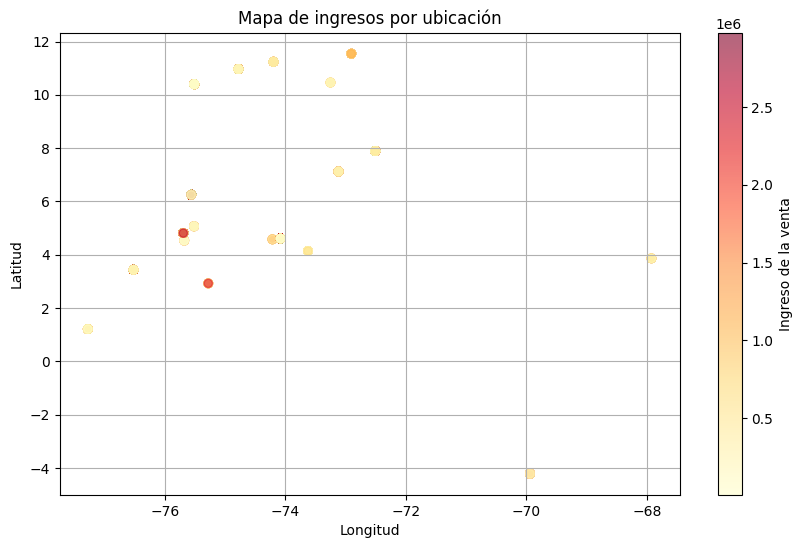

In [23]:
# Dispersión por ingreso
plt.figure(figsize=(10, 6))
sc = plt.scatter(df_general['lon'], df_general['lat'], c=df_general['Precio'], cmap='YlOrRd', alpha=0.6)
plt.colorbar(sc, label='Ingreso de la venta')
plt.title('Mapa de ingresos por ubicación')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.show()


In [24]:
!pip install folium


In [25]:
import folium
from folium.plugins import HeatMap

# Crear mapa base centrado en una coordenada promedio
lat_media = df_general['lat'].mean()
lon_media = df_general['lon'].mean()
mapa = folium.Map(location=[lat_media, lon_media], zoom_start=5)


heat_data = df_general[['lat', 'lon', 'Precio']].values.tolist()
HeatMap(heat_data).add_to(mapa)
mapa
